# Performance Machine Learning

## Import

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get data Reports

In [52]:
# URL ของ Google Sheets
url = "https://docs.google.com/spreadsheets/d/1M2J41NhgnGg0SxwIskfqQRSHmYGtRlT6ztNaQm64lsE/export?format=csv"

# อ่านไฟล์ CSV
df = pd.read_csv(
    'Reports - ML.csv')

# แสดงข้อมูล
df

,Strategy,Sample,Time frame,Deposit,margin,Start,End,Duration,Exposure Time [%],Equity Final [$],...,Win Rate [%],Best Trade [%],Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_strategy
0,Linear Regression,IS,D1,10000,1/100,2007-01-01 0:00:00,2019-12-31 0:00:00,4747 days 00:00:00,99.950642,10875.661190,...,100.000000,137.002561,137.002561,137.002561,4745 days 00:00:00,4745 days 00:00:00,NaN,137.002561,NaN,Linear_Regression
1,Linear Regression,OOS,D1,10000,1/100,2020-01-01 0:00:00,2023-03-10 0:00:00,1164 days 00:00:00,99.798184,10302.394250,...,100.000000,19.776820,19.776820,19.776820,1162 days 00:00:00,1162 days 00:00:00,NaN,19.776820,NaN,Linear_Regression
2,Linear Regression,IS,H4,10000,1/100,2007-01-01 0:00:00,2019-12-31 20:00:00,4747 days 20:00:00,99.990417,10883.780840,...,100.000000,138.979541,138.979541,138.979541,4747 days 12:00:00,4747 days 12:00:00,NaN,138.979541,NaN,Linear_Regression
3,Linear Regression,OOS,H4,10000,1/100,2020-01-01 20:00:00,2023-03-10 16:00:00,1163 days 20:00:00,99.960823,10342.405950,...,100.000000,22.518128,22.518128,22.518128,1163 days 12:00:00,1163 days 12:00:00,NaN,22.518128,NaN,Linear_Regression
4,Linear Regression,IS,H1,10000,1/100,2007-01-01 0:00:00,2019-12-31 21:00:00,4747 days 21:00:00,99.997471,9712.414624,...,55.763994,5.240521,-11.391378,-0.004772,53 days 17:00:00,1 days 11:00:00,1.003838,0.001313,-0.374784,Linear_Regression
5,Linear Regression,OOS,H1,10000,1/100,2020-01-01 23:00:00,2023-03-10 17:00:00,1163 days 18:00:00,99.989397,10395.203820,...,55.572519,4.230027,-5.988012,0.032884,34 days 17:00:00,1 days 19:00:00,1.115302,0.039447,0.764771,Linear_Regression
6,Linear Regression,IS,M30,10000,1/100,2007-01-01 0:00:00,2019-12-31 21:30:00,4747 days 21:30:00,99.998730,2953.342617,...,54.878255,3.207378,-6.187999,-0.013321,4 days 04:30:00,0 days 02:45:00,0.868920,-0.012839,-9.366860,Linear_Regression
7,Linear Regression,OOS,M30,10000,1/100,2020-01-01 23:00:00,2023-03-10 17:30:00,1163 days 18:30:00,99.994697,7787.445444,...,54.285443,2.847547,-5.182778,-0.011702,3 days 10:30:00,0 days 02:40:00,0.873718,-0.011307,-4.316732,Linear_Regression
8,Logistic Regression,IS,D1,10000,1/100,2007-01-01 0:00:00,2019-12-31 0:00:00,4747 days 00:00:00,99.950642,10789.730900,...,56.681351,8.243991,-13.413145,0.099851,169 days 00:00:00,7 days 00:00:00,1.185638,0.127923,1.060681,Logistic_Regression
9,Logistic Regression,OOS,D1,10000,1/100,2020-01-01 0:00:00,2023-03-10 0:00:00,1164 days 00:00:00,99.798184,10122.075340,...,55.639098,6.720071,-7.751037,0.047277,71 days 00:00:00,9 days 00:00:00,1.095098,0.074012,0.254887,Logistic_Regression


### Group by Name strategy

In [53]:
data = df.copy()

In [54]:
strategy_name = data.groupby('Strategy', sort=False)

In [55]:
strategy_name

In [56]:
strategies = []
for group_name, group_data in strategy_name:
    strategies.append(group_name)

In [57]:
strategies

['Linear Regression',
 'Logistic Regression',
 'Mutiple Linear Regression',
 'Random Forest',
 'Support Vector Classifier',
 'Support Vector Regression']

In [58]:
title = 'Machine Learning'

## Win Rate [%]

In [59]:
Evaluation = 'Win Rate [%]'

### IS

In [60]:
Sample = 'IS'

In [61]:
df[Evaluation] = df[Evaluation].fillna(0).astype(int)

In [62]:
D1 = df.loc[(df['Time frame'] == 'D1') & (df['Sample'] == Sample), Evaluation]
H4 = df.loc[(df['Time frame'] == 'H4') & (df['Sample'] == Sample), Evaluation]
H1 = df.loc[(df['Time frame'] == 'H1') & (df['Sample'] == Sample), Evaluation]
M30 = df.loc[(df['Time frame'] == 'M30') & (
    df['Sample'] == Sample), Evaluation]

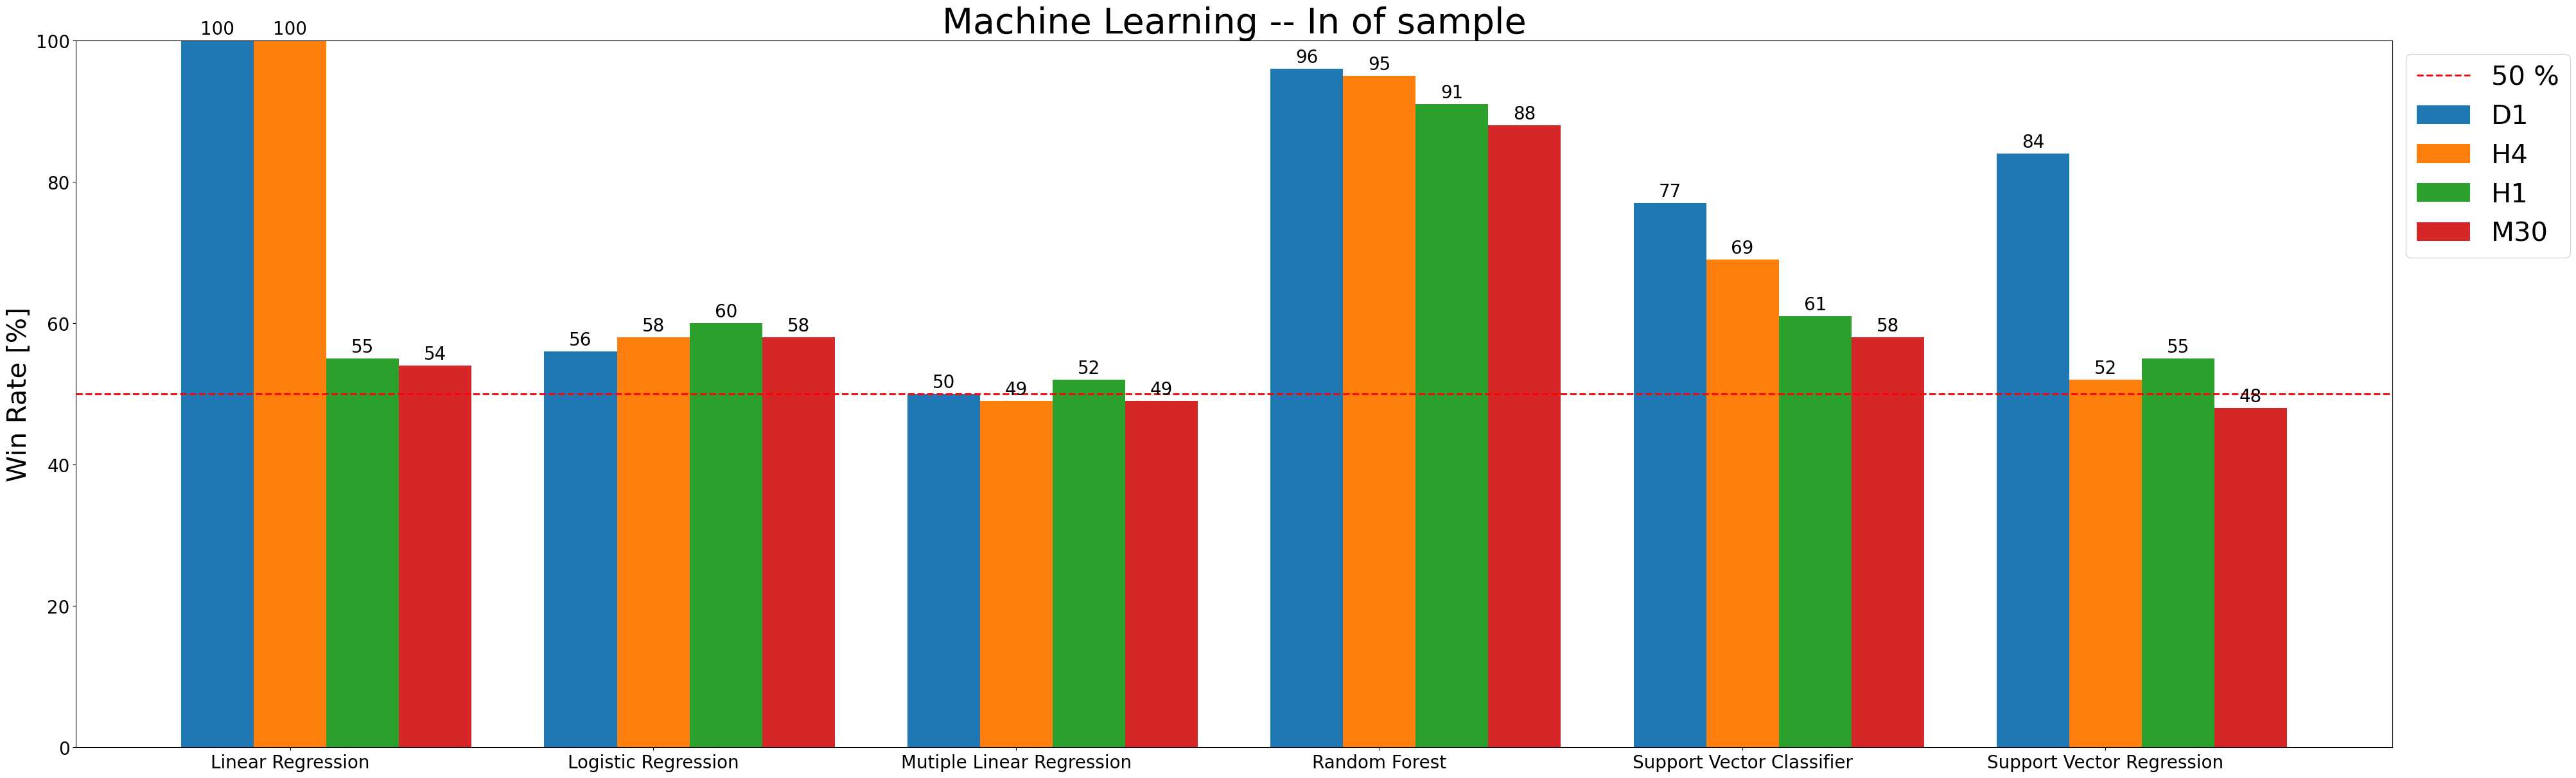

In [63]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': D1,
    'H4': H4,
    'H1': H1,
    'M30': M30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize=(40, 12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=TF)
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=50, color='r', linestyle='--', linewidth=2, label='50 %')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(f'{title} -- In of sample', fontsize=40)
ax.set_ylabel(Evaluation, fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=20)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 100)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)

plt.show()

### OOS

In [64]:
Sample = 'OOS'

In [65]:
df[Evaluation] = df[Evaluation].fillna(0).astype(int)

In [66]:
D1 = df.loc[(df['Time frame'] == 'D1') & (df['Sample'] == Sample), Evaluation]
H4 = df.loc[(df['Time frame'] == 'H4') & (df['Sample'] == Sample), Evaluation]
H1 = df.loc[(df['Time frame'] == 'H1') & (df['Sample'] == Sample), Evaluation]
M30 = df.loc[(df['Time frame'] == 'M30') & (
    df['Sample'] == Sample), Evaluation]

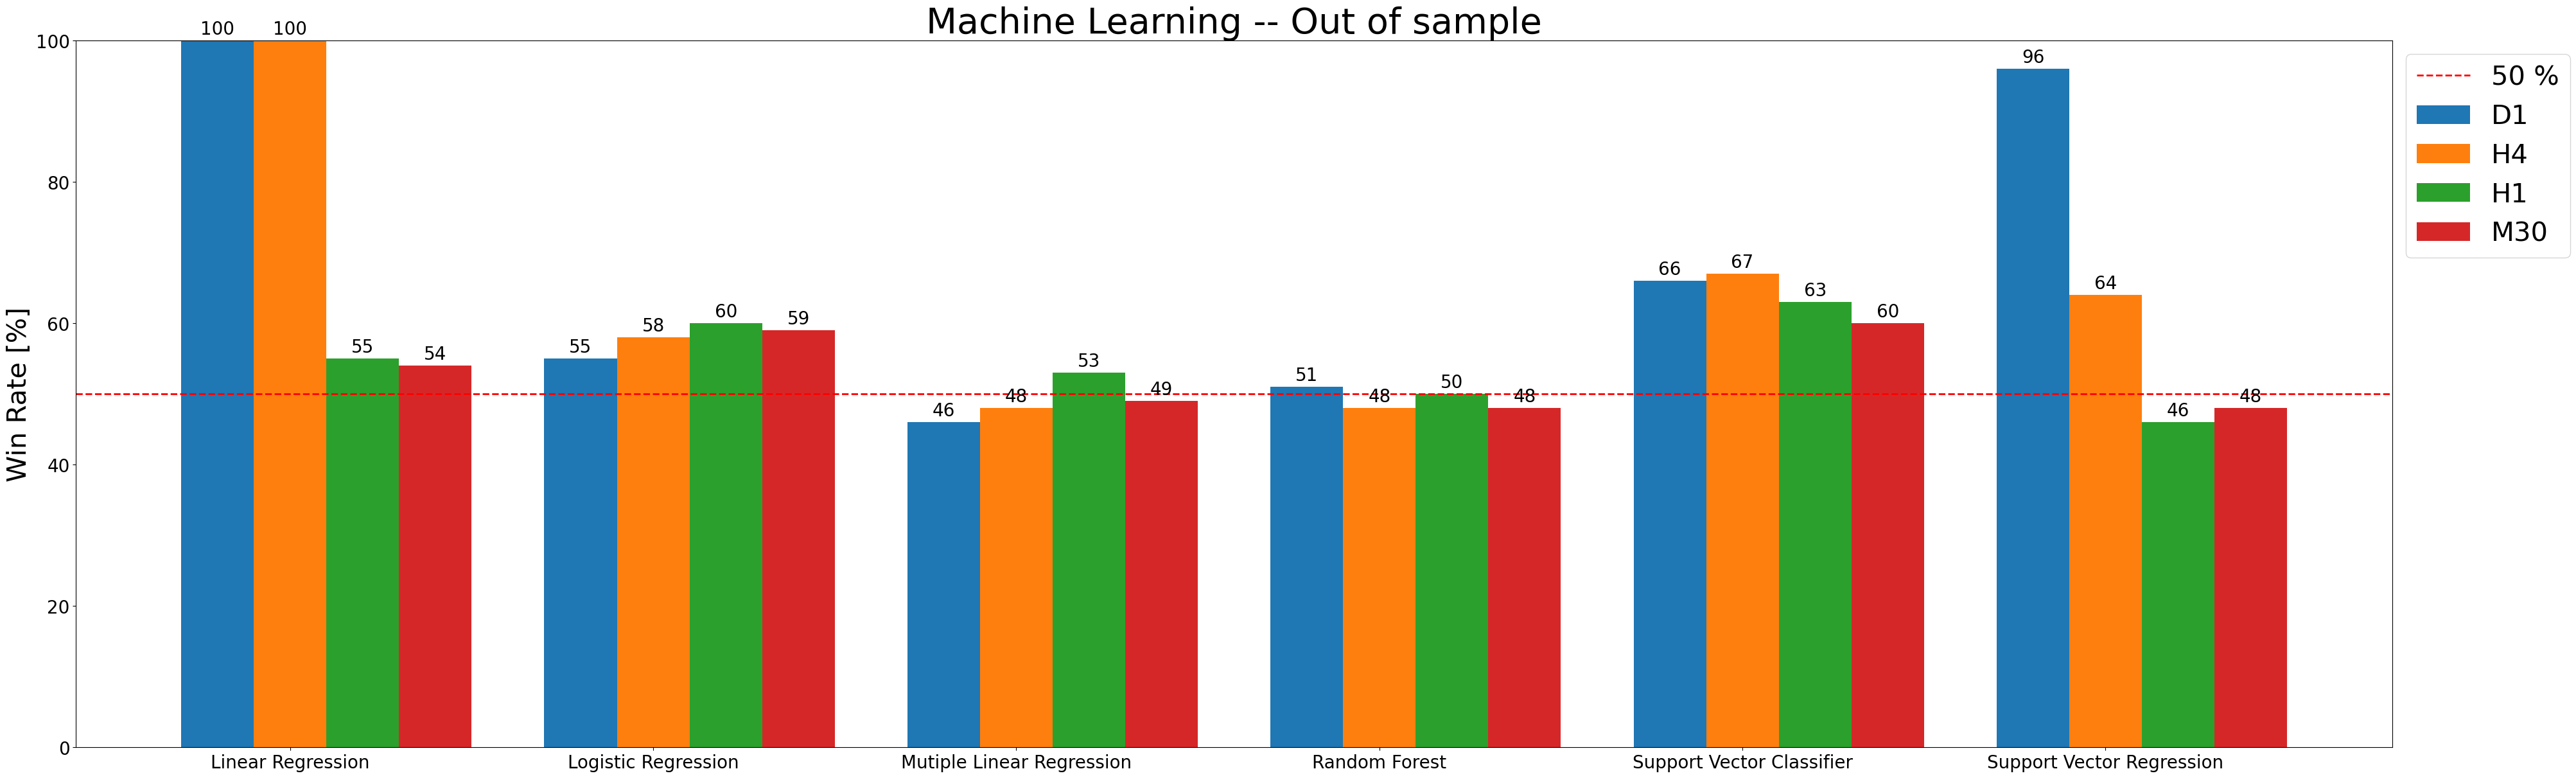

In [67]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': D1,
    'H4': H4,
    'H1': H1,
    'M30': M30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize=(40, 12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=TF)
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=50, color='r', linestyle='--', linewidth=2, label='50 %')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(f'{title} -- Out of sample', fontsize=40)
ax.set_ylabel(Evaluation, fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=20)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 100)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)

plt.show()

## Profit Factor

In [68]:
Evaluation = 'Profit Factor'

In [69]:
df[Evaluation] = df[Evaluation].fillna(0).round(2)

### IS

In [70]:
Sample = 'IS'

In [71]:
D1 = df.loc[(df['Time frame'] == 'D1') & (df['Sample'] == Sample), Evaluation]
H4 = df.loc[(df['Time frame'] == 'H4') & (df['Sample'] == Sample), Evaluation]
H1 = df.loc[(df['Time frame'] == 'H1') & (df['Sample'] == Sample), Evaluation]
M30 = df.loc[(df['Time frame'] == 'M30') & (
    df['Sample'] == Sample), Evaluation]

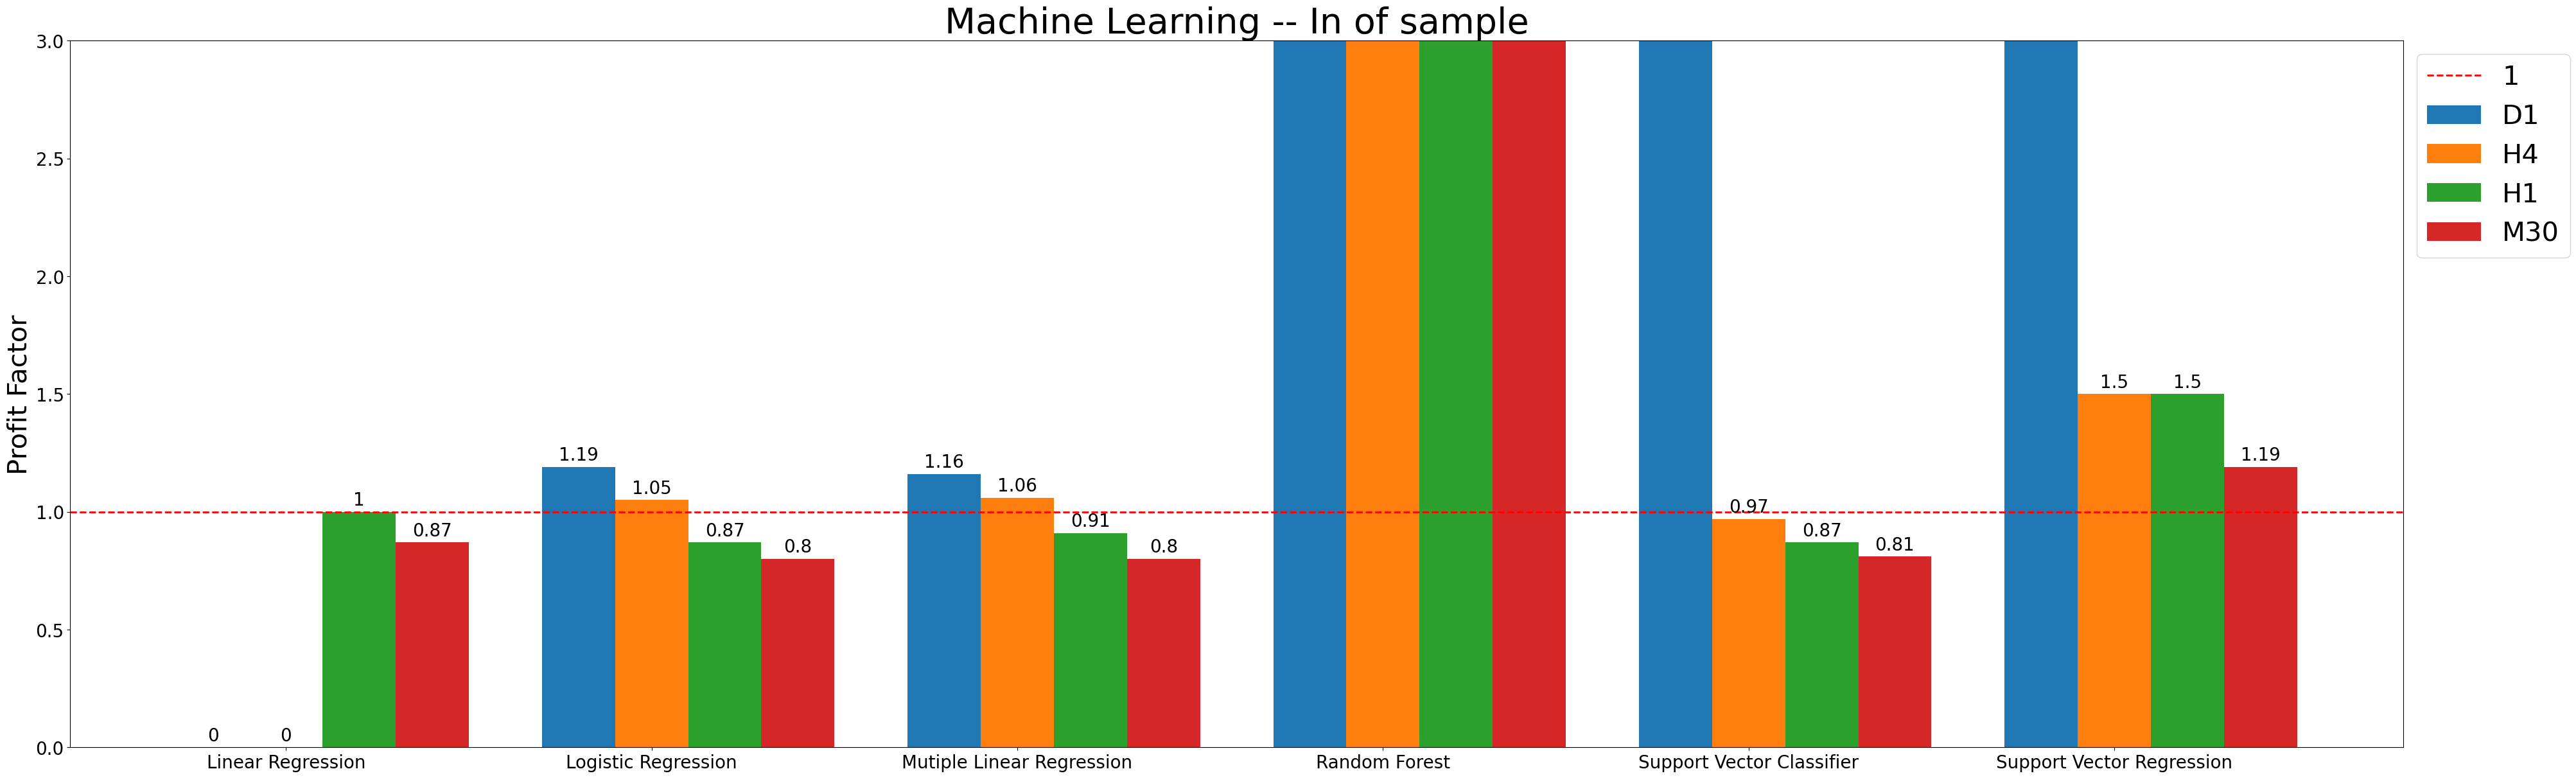

In [72]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': D1,
    'H4': H4,
    'H1': H1,
    'M30': M30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize=(40, 12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=TF)
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=1, color='r', linestyle='--', linewidth=2, label='1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(f'{title} -- In of sample', fontsize=40)
ax.set_ylabel(Evaluation, fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=20)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 3)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)

plt.show()

### OOS

In [73]:
Sample = 'OOS'

In [74]:
D1 = df.loc[(df['Time frame'] == 'D1') & (df['Sample'] == Sample), Evaluation]
H4 = df.loc[(df['Time frame'] == 'H4') & (df['Sample'] == Sample), Evaluation]
H1 = df.loc[(df['Time frame'] == 'H1') & (df['Sample'] == Sample), Evaluation]
M30 = df.loc[(df['Time frame'] == 'M30') & (
    df['Sample'] == Sample), Evaluation]

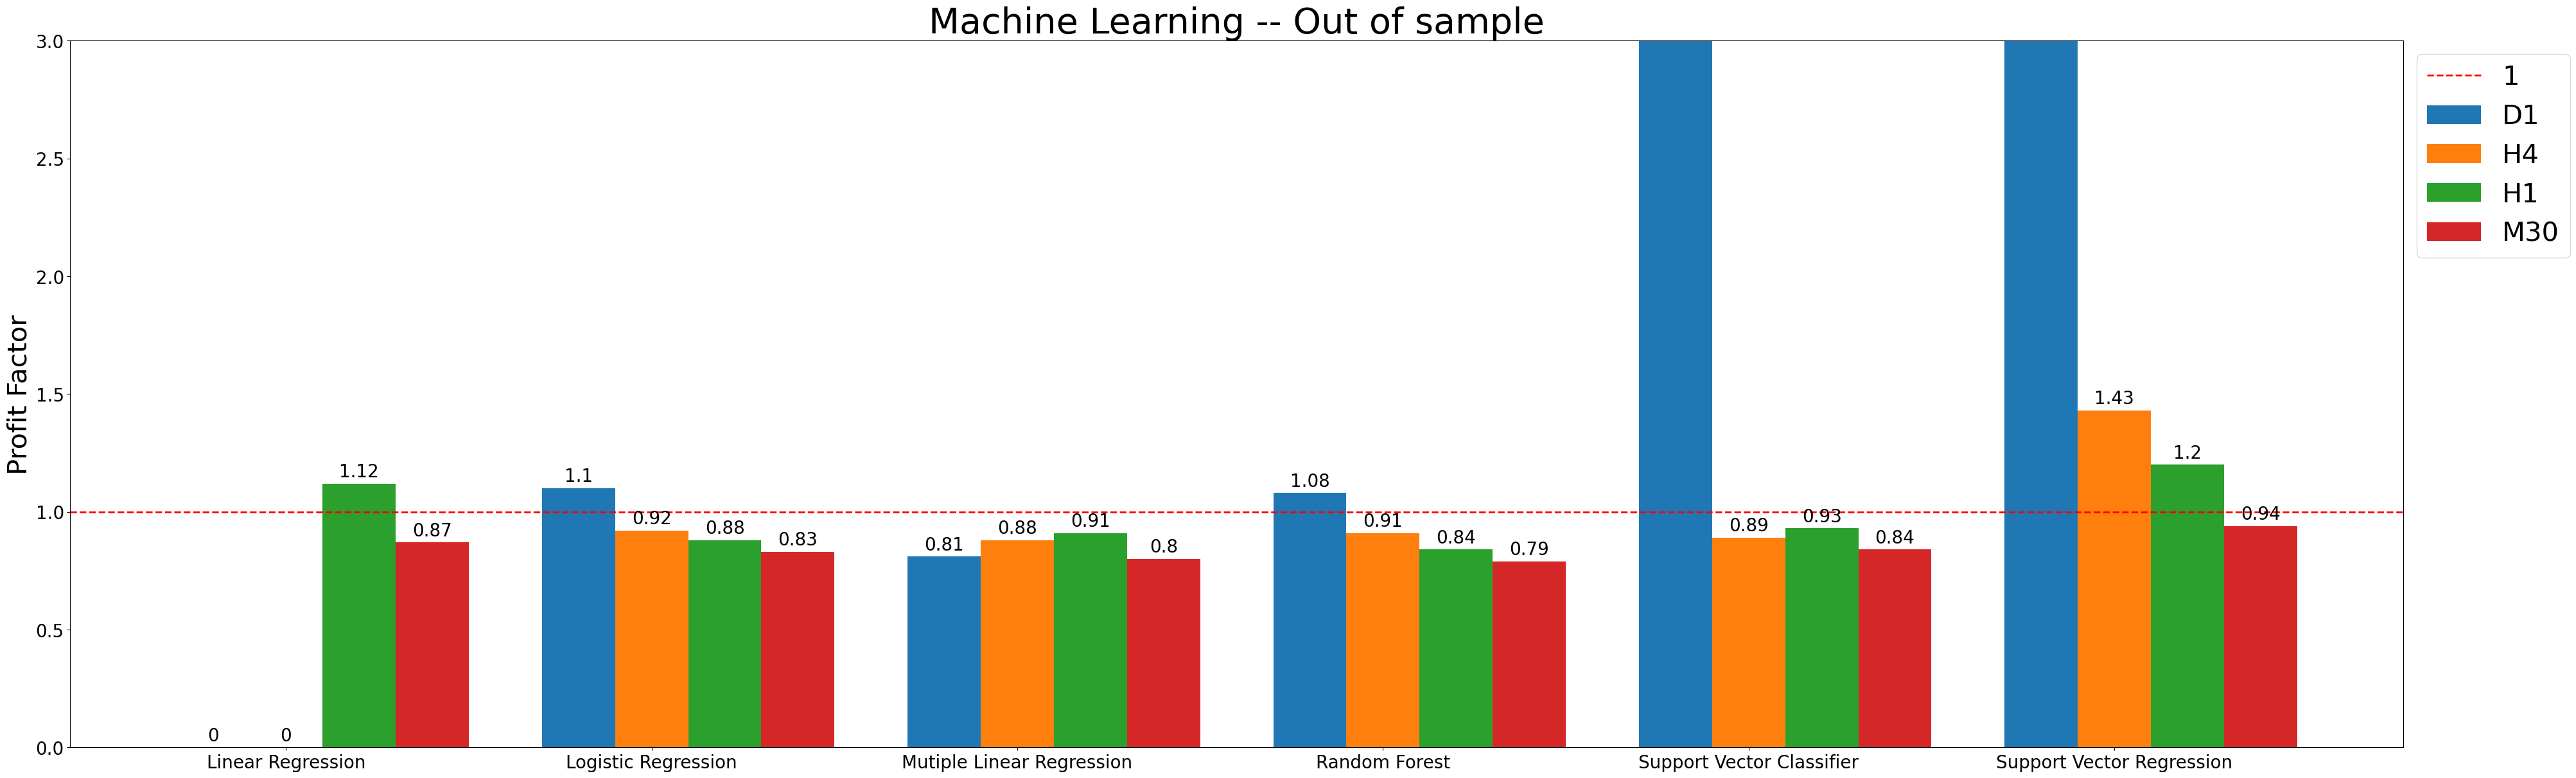

In [75]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': D1,
    'H4': H4,
    'H1': H1,
    'M30': M30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize=(40, 12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=TF)
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=1, color='r', linestyle='--', linewidth=2, label='1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(f'{title} -- Out of sample', fontsize=40)
ax.set_ylabel(Evaluation, fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=20)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 3)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)

plt.show()

## Sharpe Ratio

In [76]:
Evaluation = 'Sharpe Ratio'

In [77]:
df[Evaluation] = df[Evaluation].fillna(0).round(2)

### IS

In [78]:
Sample = 'IS'

In [79]:
D1 = df.loc[(df['Time frame'] == 'D1') & (df['Sample'] == Sample), Evaluation]
H4 = df.loc[(df['Time frame'] == 'H4') & (df['Sample'] == Sample), Evaluation]
H1 = df.loc[(df['Time frame'] == 'H1') & (df['Sample'] == Sample), Evaluation]
M30 = df.loc[(df['Time frame'] == 'M30') & (
    df['Sample'] == Sample), Evaluation]

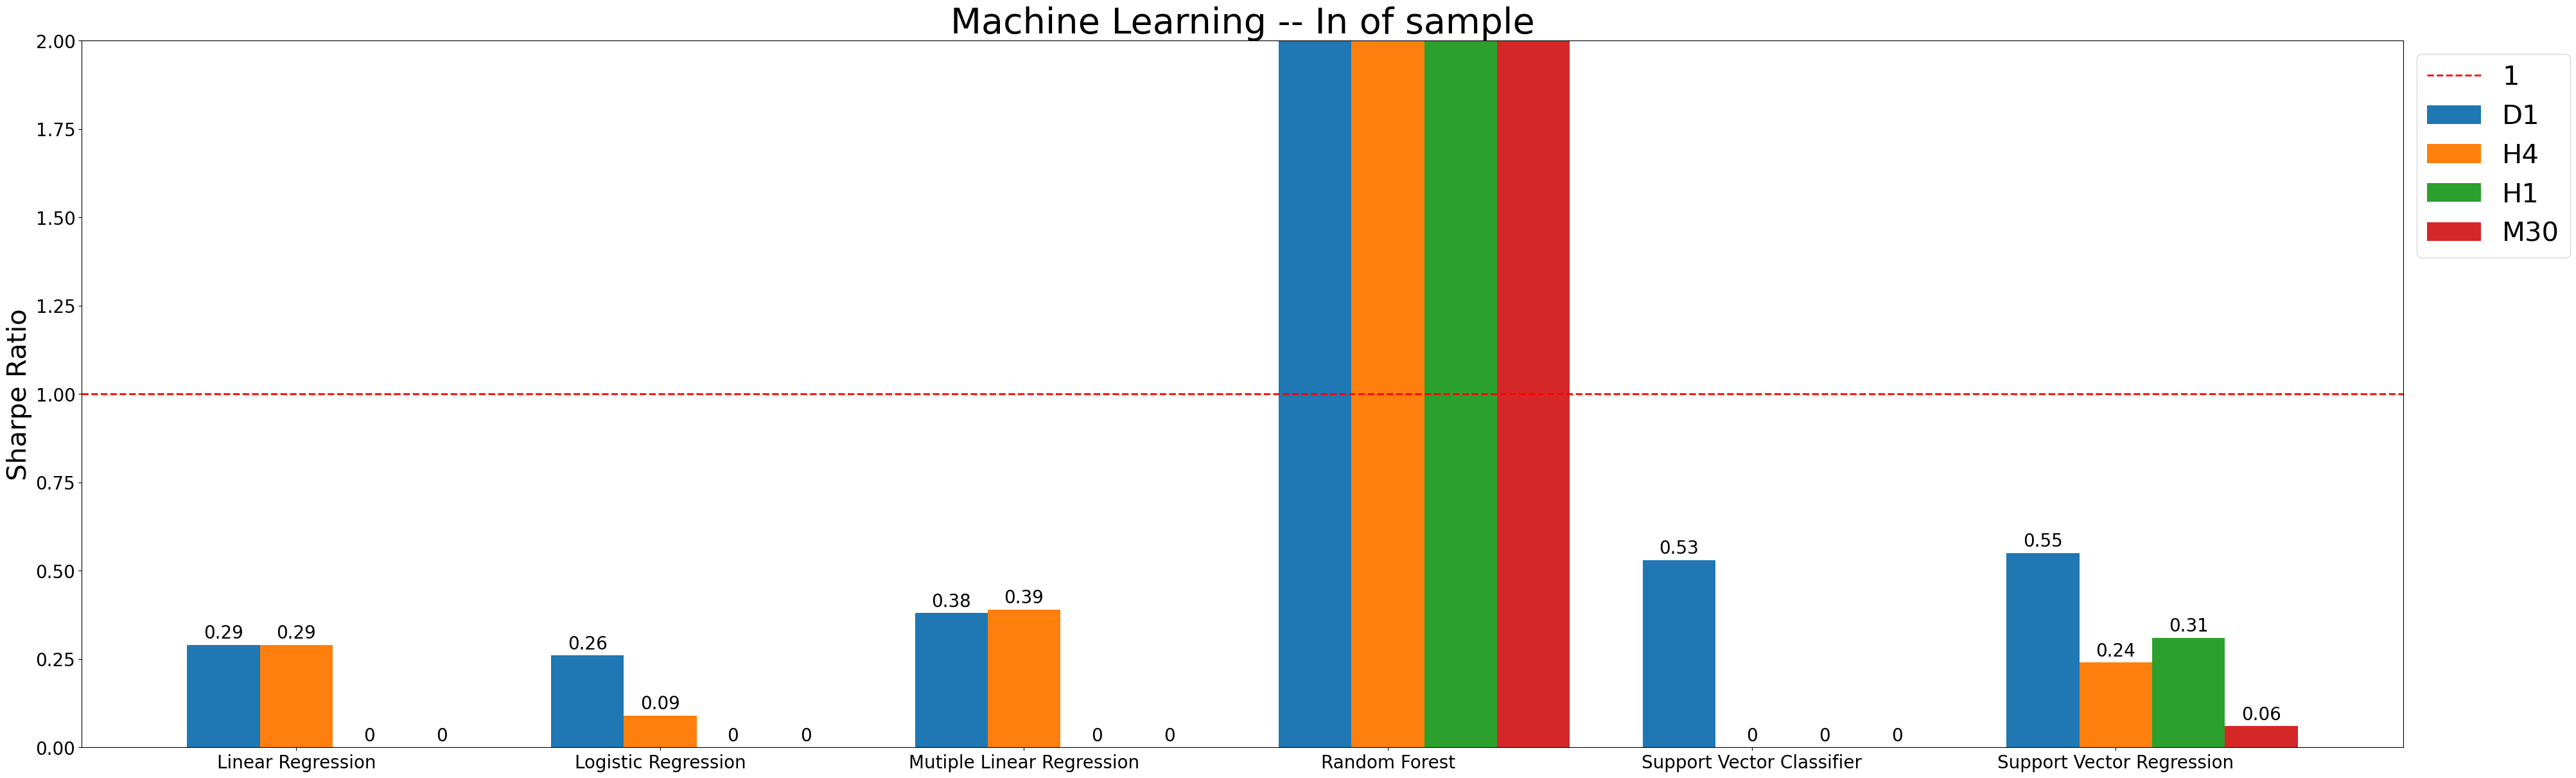

In [80]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': D1,
    'H4': H4,
    'H1': H1,
    'M30': M30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize=(40, 12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=TF)
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=1, color='r', linestyle='--', linewidth=2, label='1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(f'{title} -- In of sample', fontsize=40)
ax.set_ylabel(Evaluation, fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=20)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 2)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)

plt.show()

### OOS

In [81]:
Sample = 'OOS'

In [82]:
D1 = df.loc[(df['Time frame'] == 'D1') & (df['Sample'] == Sample), Evaluation]
H4 = df.loc[(df['Time frame'] == 'H4') & (df['Sample'] == Sample), Evaluation]
H1 = df.loc[(df['Time frame'] == 'H1') & (df['Sample'] == Sample), Evaluation]
M30 = df.loc[(df['Time frame'] == 'M30') & (
    df['Sample'] == Sample), Evaluation]

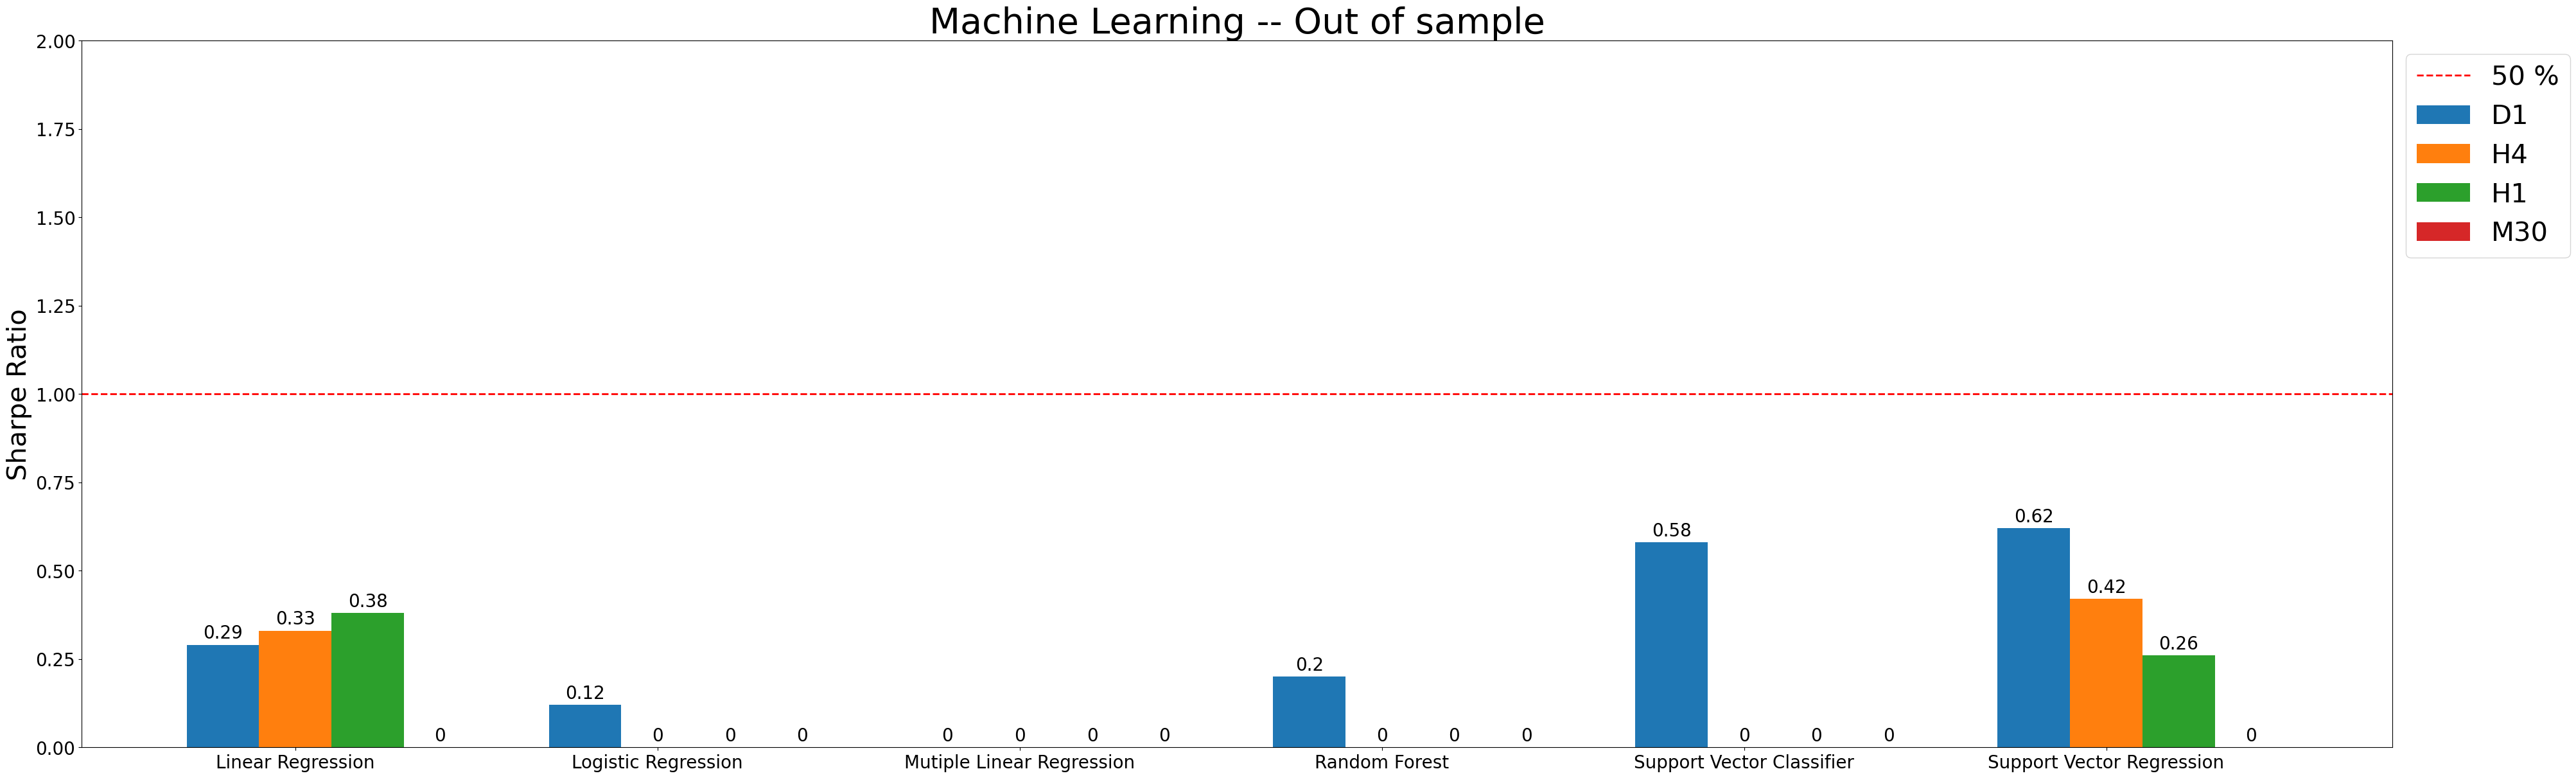

In [83]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': D1,
    'H4': H4,
    'H1': H1,
    'M30': M30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize=(40, 12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=TF)
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=1, color='r', linestyle='--', linewidth=2, label='50 %')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(f'{title} -- Out of sample', fontsize=40)
ax.set_ylabel(Evaluation, fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=20)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 2)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)

plt.show()

## Sortino Ratio

In [84]:
Evaluation = 'Sortino Ratio'

In [85]:
df[Evaluation] = df[Evaluation].fillna(0).round(2)

### IS

In [86]:
Sample = 'IS'

In [87]:
D1 = df.loc[(df['Time frame'] == 'D1') & (df['Sample'] == Sample), Evaluation]
H4 = df.loc[(df['Time frame'] == 'H4') & (df['Sample'] == Sample), Evaluation]
H1 = df.loc[(df['Time frame'] == 'H1') & (df['Sample'] == Sample), Evaluation]
M30 = df.loc[(df['Time frame'] == 'M30') & (
    df['Sample'] == Sample), Evaluation]

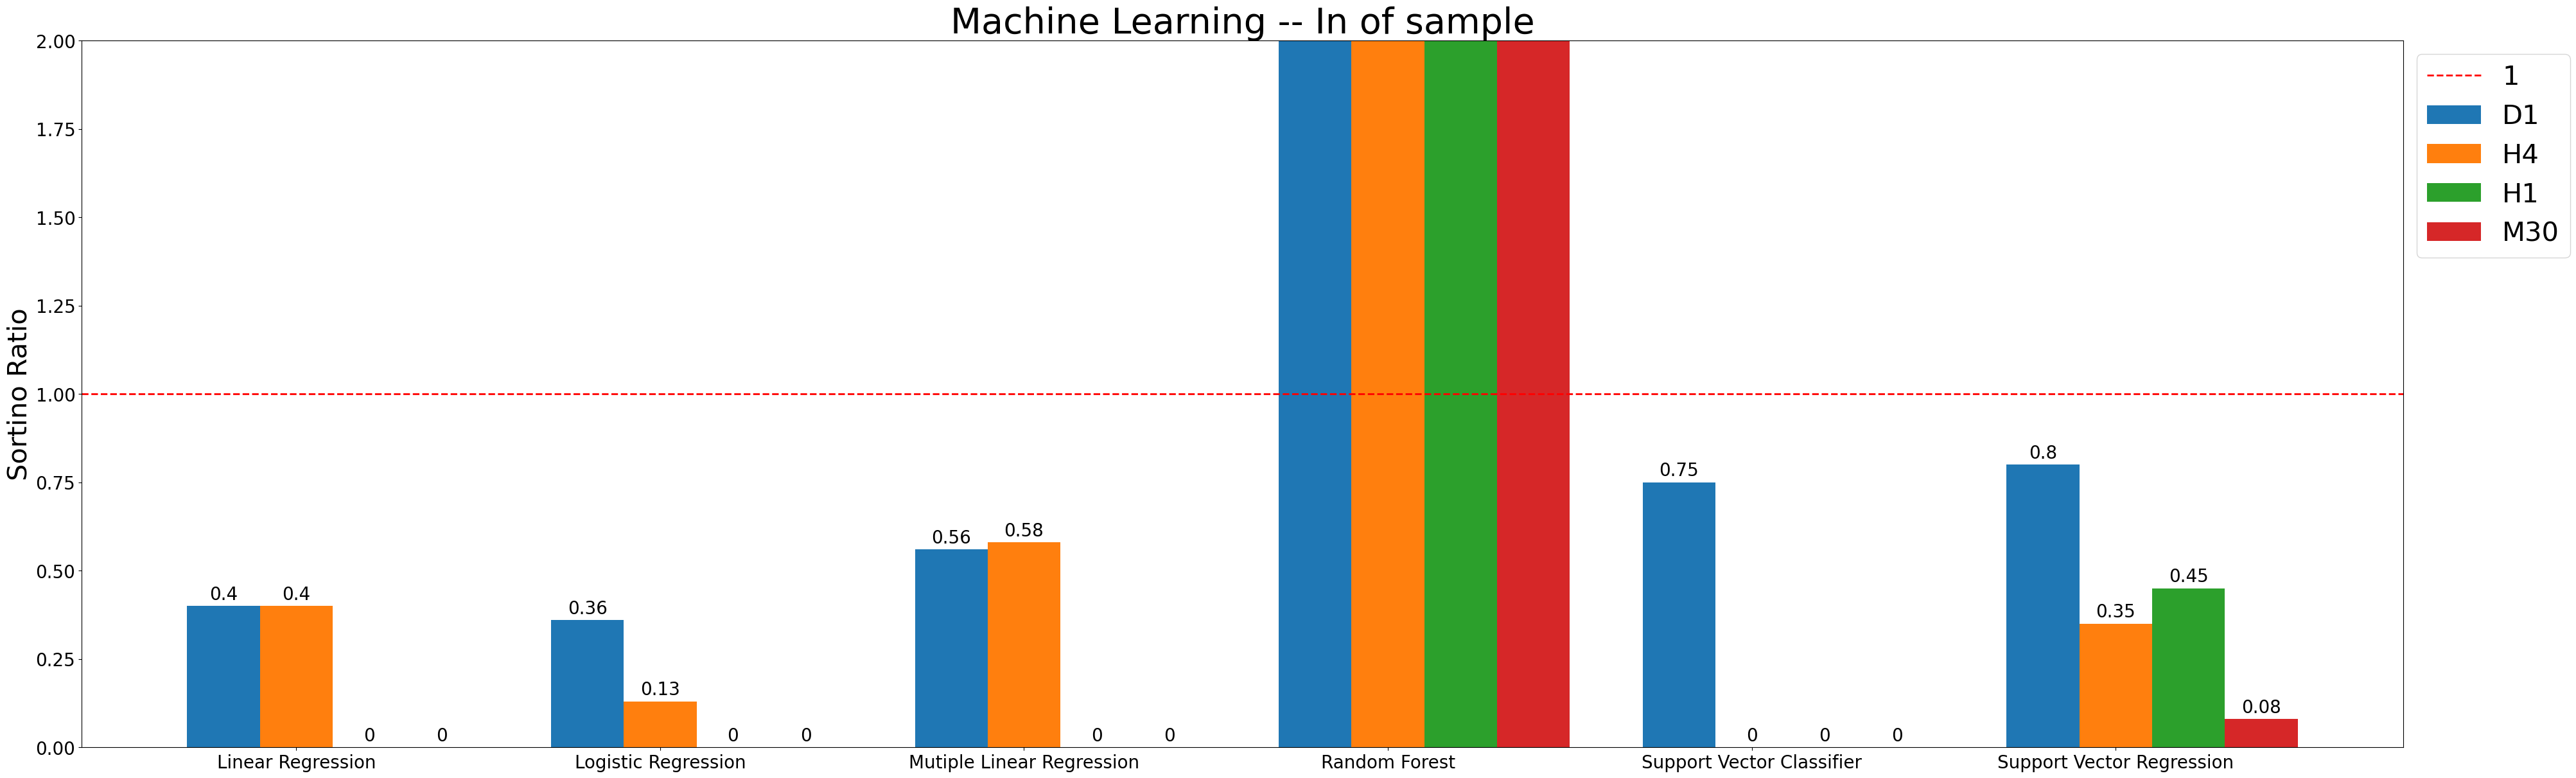

In [88]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': D1,
    'H4': H4,
    'H1': H1,
    'M30': M30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize=(40, 12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=TF)
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=1, color='r', linestyle='--', linewidth=2, label='1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(f'{title} -- In of sample', fontsize=40)
ax.set_ylabel(Evaluation, fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=20)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 2)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)

plt.show()

### OOS

In [89]:
Sample = 'OOS'

In [90]:
D1 = df.loc[(df['Time frame'] == 'D1') & (df['Sample'] == Sample), Evaluation]
H4 = df.loc[(df['Time frame'] == 'H4') & (df['Sample'] == Sample), Evaluation]
H1 = df.loc[(df['Time frame'] == 'H1') & (df['Sample'] == Sample), Evaluation]
M30 = df.loc[(df['Time frame'] == 'M30') & (
    df['Sample'] == Sample), Evaluation]

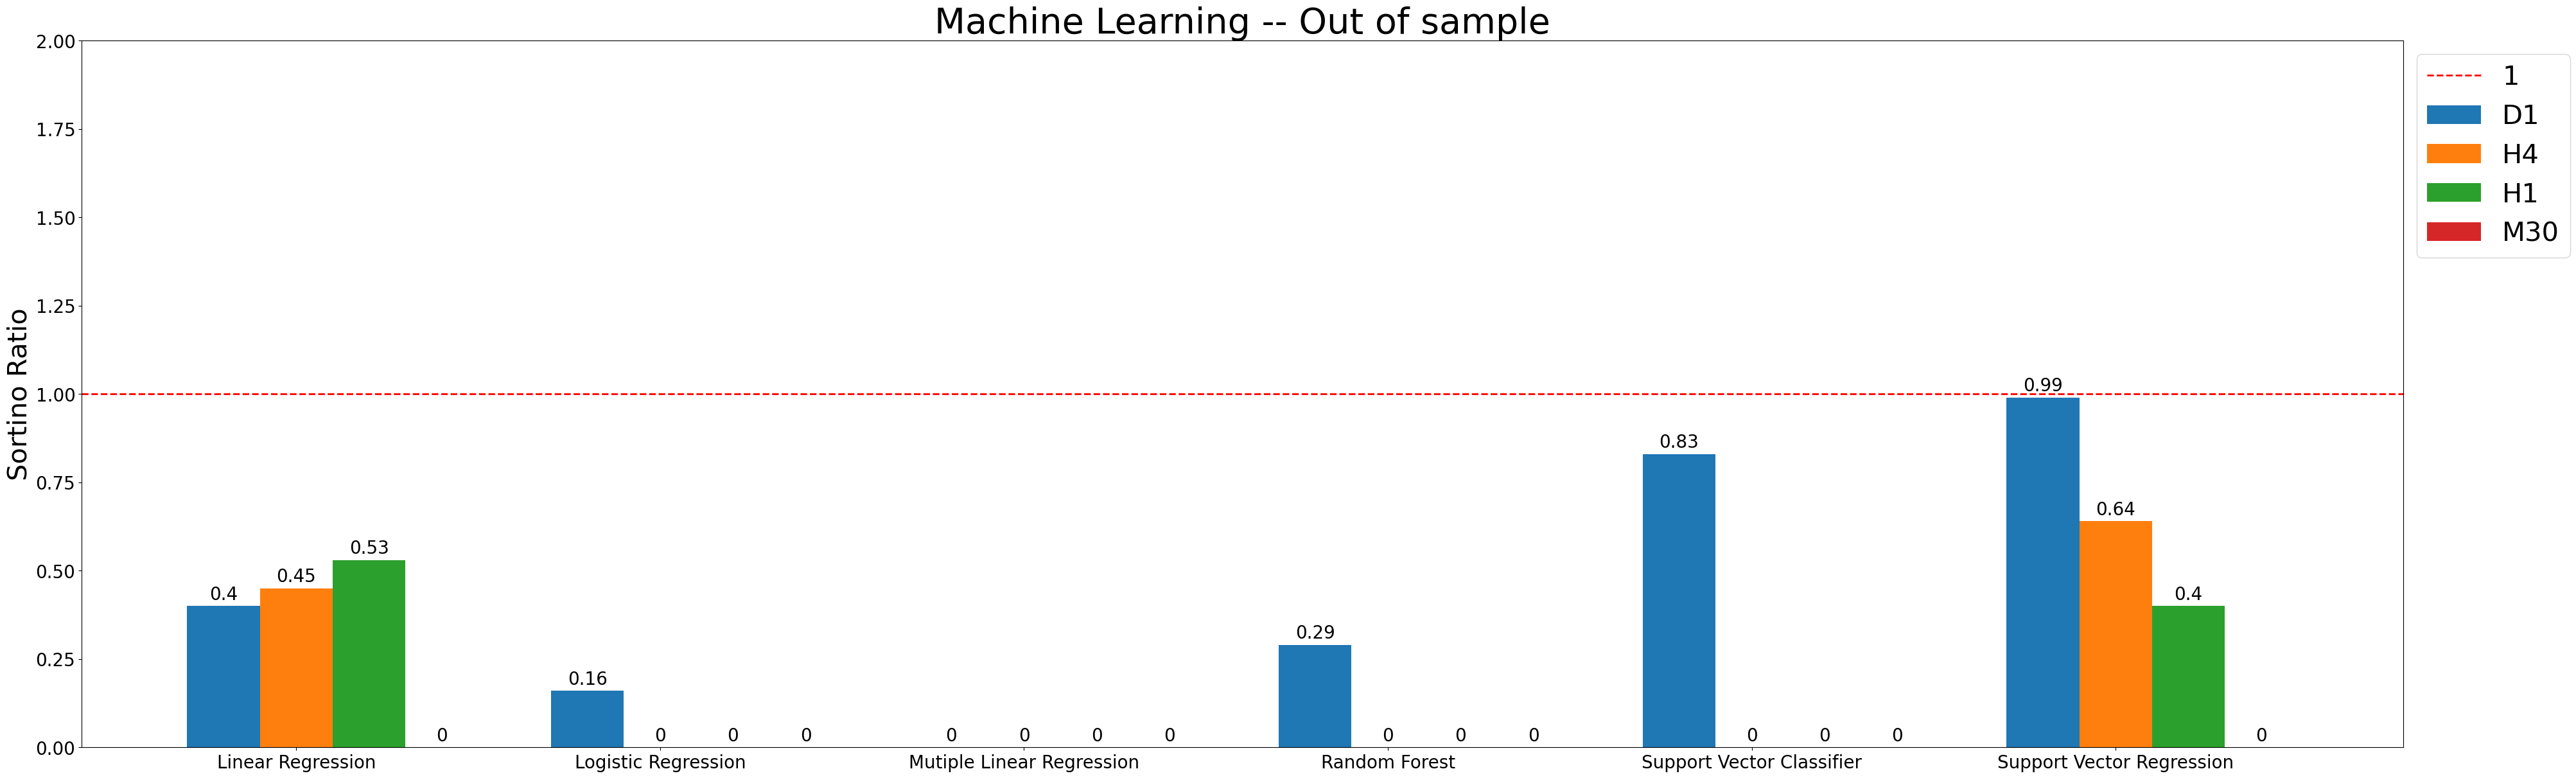

In [91]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': D1,
    'H4': H4,
    'H1': H1,
    'M30': M30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize=(40, 12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=TF)
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=1, color='r', linestyle='--', linewidth=2, label='1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(f'{title} -- Out of sample', fontsize=40)
ax.set_ylabel(Evaluation, fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=20)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 2)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)

plt.show()

## Max. Drawdown [%]

In [92]:
Evaluation = 'Max. Drawdown [%]'

In [93]:
df[Evaluation] = df[Evaluation].fillna(0).round(2)

### IS

In [94]:
Sample = 'IS'

In [95]:
D1 = df.loc[(df['Time frame'] == 'D1') & (df['Sample'] == Sample), Evaluation]
H4 = df.loc[(df['Time frame'] == 'H4') & (df['Sample'] == Sample), Evaluation]
H1 = df.loc[(df['Time frame'] == 'H1') & (df['Sample'] == Sample), Evaluation]
M30 = df.loc[(df['Time frame'] == 'M30') & (
    df['Sample'] == Sample), Evaluation]

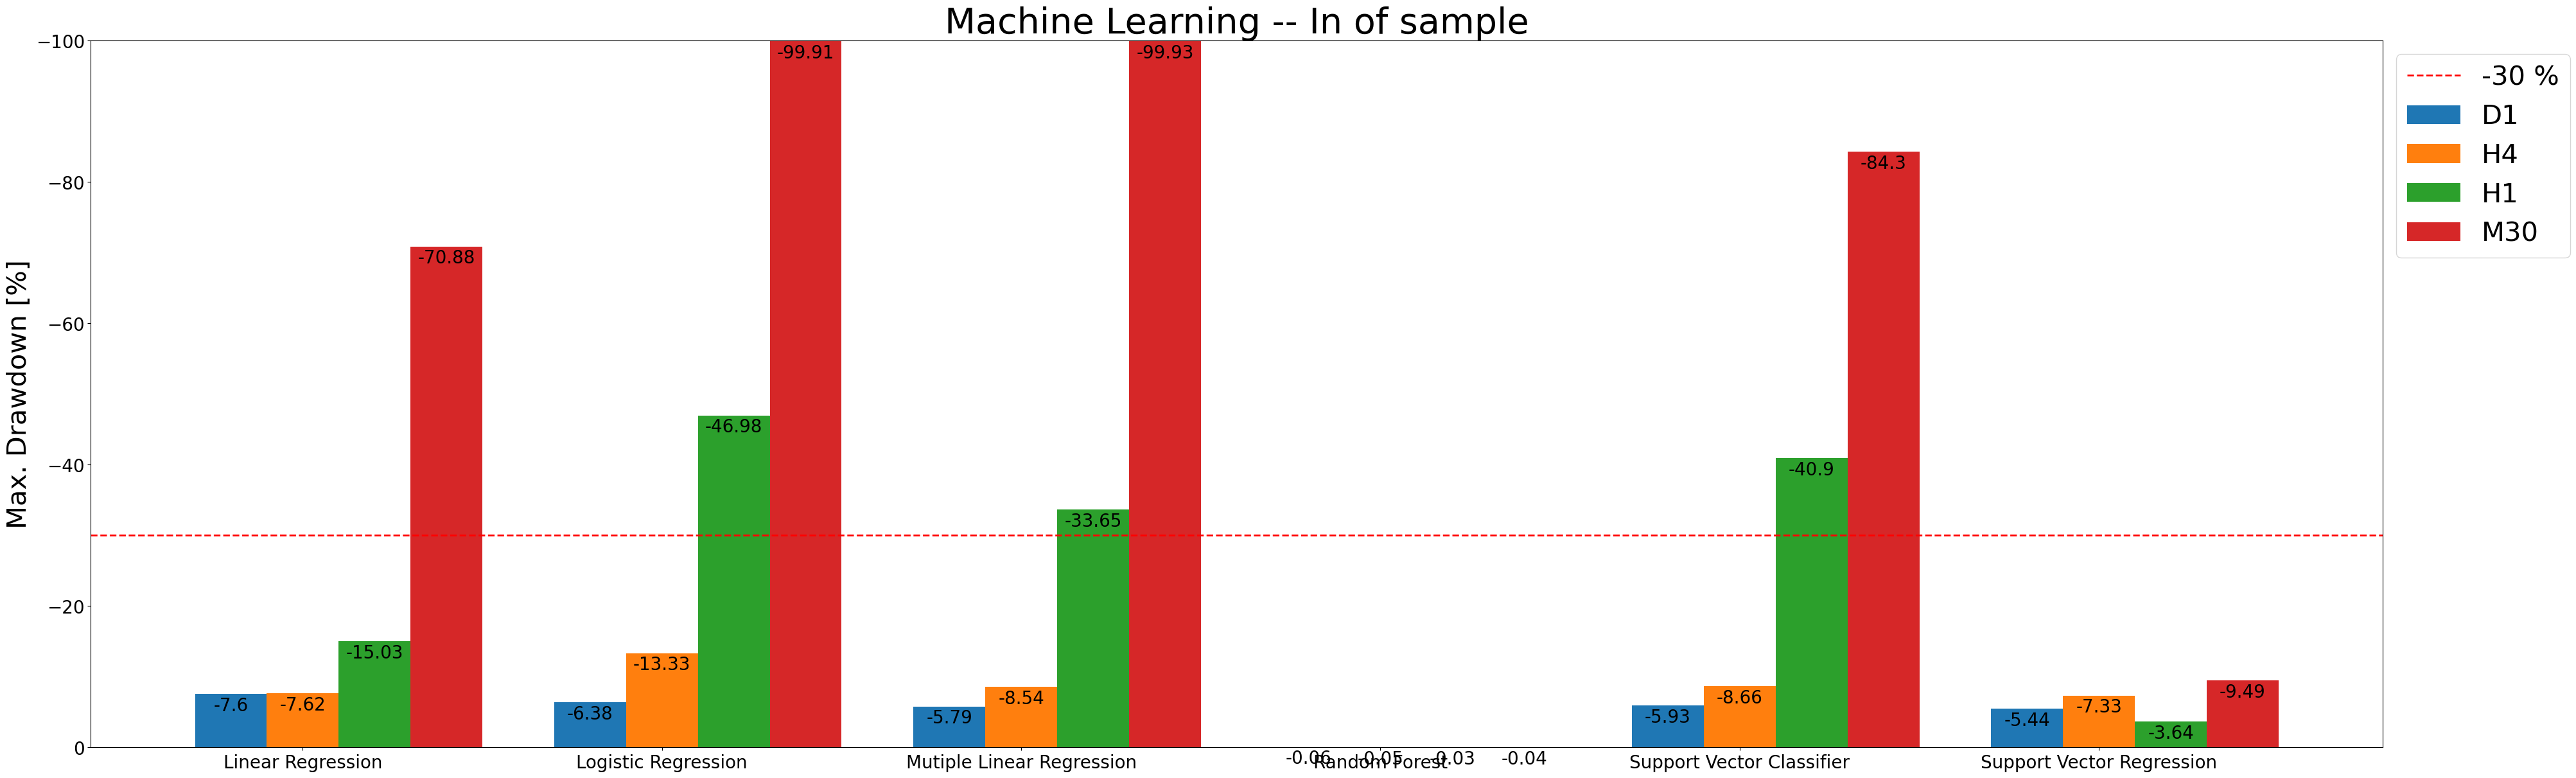

In [96]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': D1,
    'H4': H4,
    'H1': H1,
    'M30': M30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize=(40, 12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=TF)
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=-30, color='r', linestyle='--', linewidth=2, label='-30 %')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(f'{title} -- In of sample', fontsize=40)
ax.set_ylabel(Evaluation, fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=20)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, -100)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)

plt.show()

### OOS

In [97]:
Sample = 'OOS'

In [98]:
D1 = df.loc[(df['Time frame'] == 'D1') & (df['Sample'] == Sample), Evaluation]
H4 = df.loc[(df['Time frame'] == 'H4') & (df['Sample'] == Sample), Evaluation]
H1 = df.loc[(df['Time frame'] == 'H1') & (df['Sample'] == Sample), Evaluation]
M30 = df.loc[(df['Time frame'] == 'M30') & (
    df['Sample'] == Sample), Evaluation]

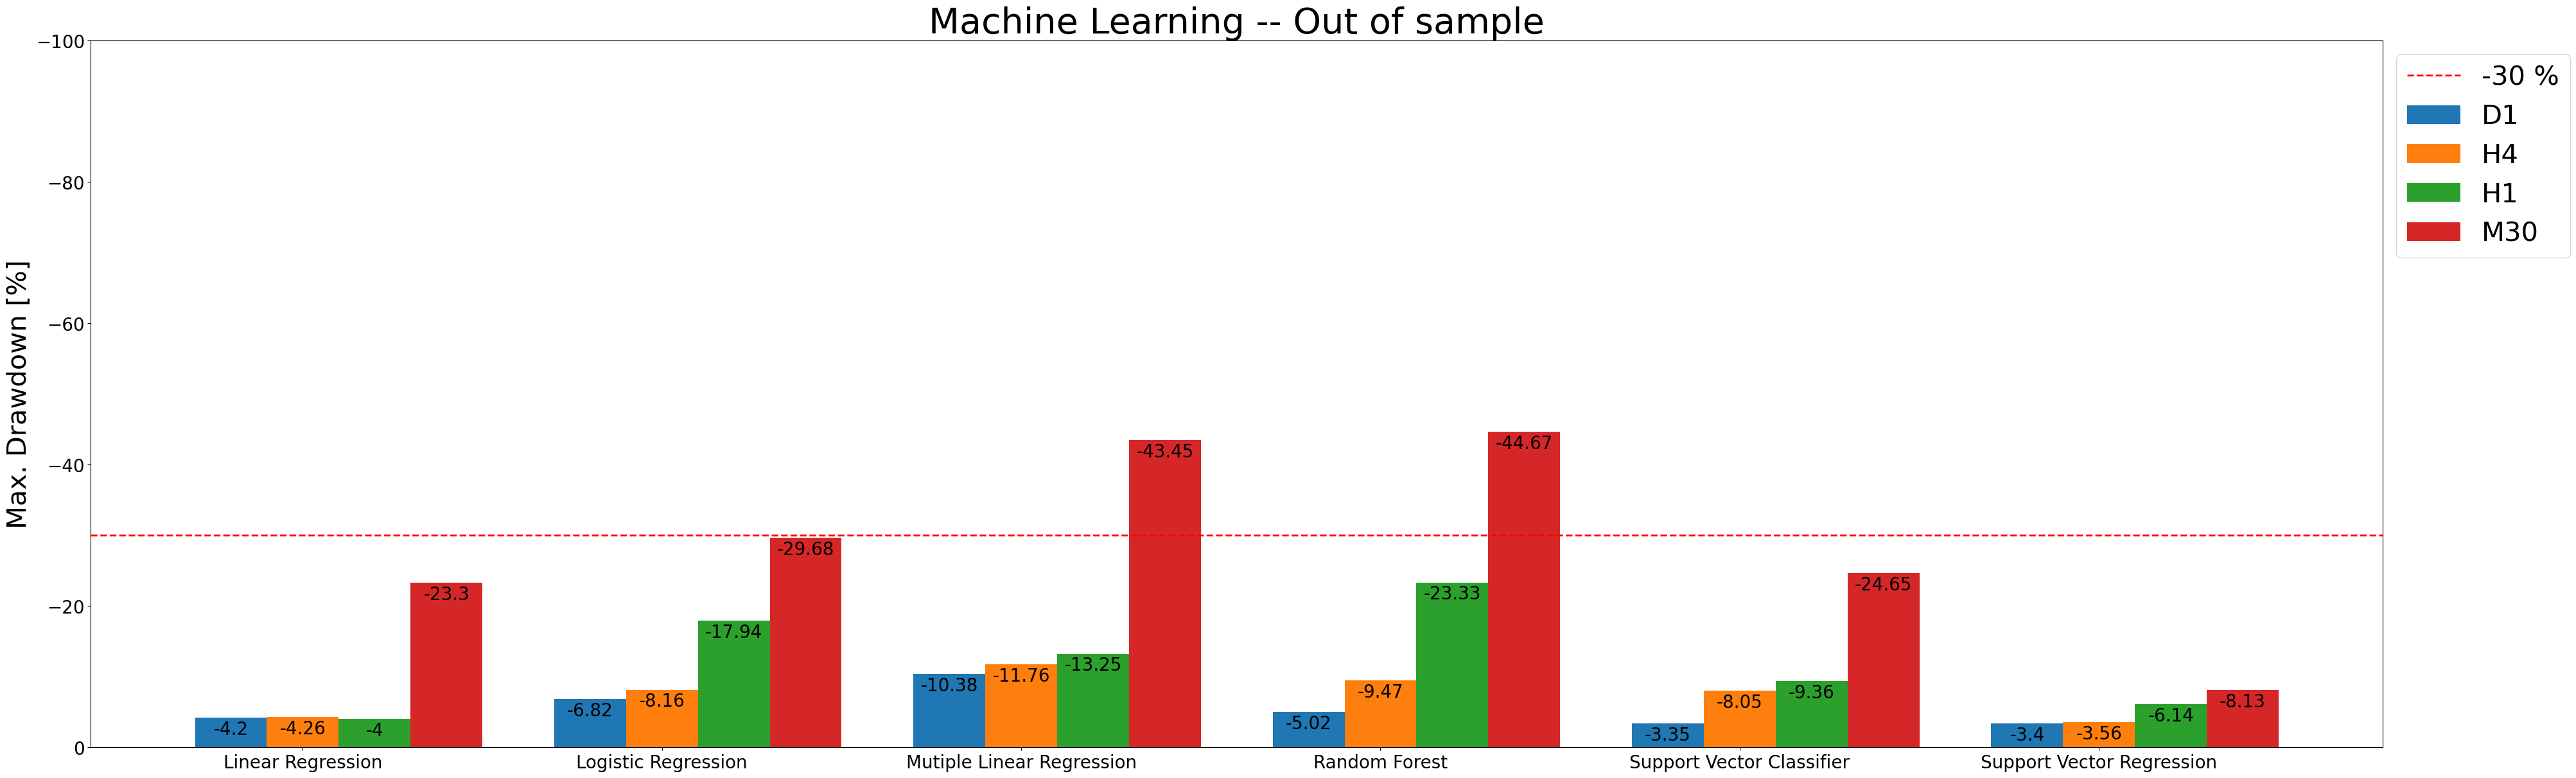

In [99]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': D1,
    'H4': H4,
    'H1': H1,
    'M30': M30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize=(40, 12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=TF)
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=-30, color='r', linestyle='--', linewidth=2, label='-30 %')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(f'{title} -- Out of sample', fontsize=40)
ax.set_ylabel(Evaluation, fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=20)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, -100)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)

plt.show()